<a href="https://colab.research.google.com/github/Freaker99/domain-classifier/blob/main/Domain_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

https://www.unb.ca/cic/datasets/dns-2021.html

# Import Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


# Data Collection and Processing

In [73]:
# loading csv data to a Pandas DataFrame
bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')
malware_data = pd.read_csv('/content/drive/My Drive/CSV_malware.csv')

<ipython-input-73-b21ad4e4e40b>:2: DtypeWarning: Columns (9,10,12,13,17,18,20,21,24,25,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')


In [74]:
# print first 5 rows in the dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0


In [75]:
# print last 5 rows in the dataframe
bening_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
494130,NaN,NaN,298,NaN,b'rossdawson.com.',New South Wales,NaN,AU,2006-02-05 02:21:21,0,0,ROSSDAWSON.COM,876461.0,0.0,Advanced Human Technologies,11,dawson,0,-1.0,"['r', 'o', 's', 's', 'd', 'a', 'w', 's', 'o', 'n']",0,2.530857,5199 days 21:58:00.670791,com,0,0,abuse@godaddy.com,0.0,0.0,"[('apple.com', 86), ('adobe.com', 86)]",0,"['ros', 'oss', 'ssd', 'sda', 'daw', 'aws', 'wso', 'son']","defaultdict(<class 'int'>, {'o': 2, 'r': 1, 'n': 1, 'a': 1, 's': 3, 'w': 1, 'd': 1})","['ro', 'os', 'ss', 'sd', 'da', 'aw', 'ws', 'so', 'on']",GoDaddy.com LLC,rossdawson,2.0,-1.0
494131,DE,8560.0,3599,217.160.0.178,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,0,weddingprime.de,-1.0,0.0,NaN,13,wedding,0,-1.0,"['w', 'e', 'd', 'd', 'i', 'n', 'g', 'p', 'r', 'i', 'm', 'e']",0,2.954252,0,de,0,0,NaN,0.0,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gpr', 'pri', 'rim', 'ime']","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g': 1, 'n': 1, 'm': 1, 'r': 1, 'p': 1, 'w': 1, 'd': 2})","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr', 'ri', 'im', 'me']",NaN,weddingprime,0.0,-1.0
494132,NaN,NaN,3599,NaN,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,0,weddingprime.de,-1.0,0.0,NaN,13,wedding,0,-1.0,"['w', 'e', 'd', 'd', 'i', 'n', 'g', 'p', 'r', 'i', 'm', 'e']",0,2.954252,0,de,0,0,NaN,0.0,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gpr', 'pri', 'rim', 'ime']","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g': 1, 'n': 1, 'm': 1, 'r': 1, 'p': 1, 'w': 1, 'd': 2})","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr', 'ri', 'im', 'me']",NaN,weddingprime,0.0,-1.0
494133,UA,24703.0,21599,195.128.17.206,b'vlasenko.net.',--,NaN,UA,2000-10-16 13:58:43,0,0,"['VLASENKO.NET', 'vlasenko.net']",372895.0,0.0,NaN,9,ko,0,-1.0,"['v', 'l', 'a', 's', 'e', 'n', 'k', 'o']",0,2.817711,7137 days 10:20:41.804934,net,0,0,abuse@joker.com,0.0,0.0,"[('php.net', 86), ('a8.net', 86)]",0,"['vla', 'las', 'ase', 'sen', 'enk', 'nko']","defaultdict(<class 'int'>, {'e': 1, 'k': 1, 'n': 1, 'l': 1, 'v': 1, 'a': 1, 's': 1, 'o': 1})","['vl', 'la', 'as', 'se', 'en', 'nk', 'ko']",CSL Computer Service Langenbach GmbH d/b/a joker.com,vlasenko,6.0,-1.0
494134,AU,24446.0,14399,202.47.4.14,b'drterrencescamp.com.au.',NaN,NaN,NaN,NaN,0,0,NaN,2693696.0,0.0,NaN,16,terrence,0,-1.0,"['d', 'r', 't', 'e', 'r', 'r', 'e', 'n', 'c', 'e', 's', 'c', 'a', 'm', 'p']",0,3.030639,0,com.au,0,0,NaN,0.0,0.0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['drt', 'rte', 'ter', 'err', 'rre', 'ren', 'enc', 'nce', 'ces', 'esc', 'sca', 'cam', 'amp']","defaultdict(<class 'int'>, {'t': 1, 'e': 3, 'p': 1, 'n': 1, 'm': 1, 'r': 3, 'a': 1, 's': 1, 'c': 2, 'd': 1})","['dr', 'rt', 'te', 'er', 'rr', 're', 'en', 'nc', 'ce', 'es', 'sc', 'ca', 'am', 'mp']",NaN,drterrencescamp,0.0,-1.0


In [76]:
# print first 5 rows in the dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,NaN,0,4277 days 21:07:56.450015,2.963120,6.0,"['abuse@name.com', 'roxics@gmail.com']",2008-08-04 04:20:05,Scape Films,"defaultdict(<class 'int'>, {'d': 1, 'n': 1, 'a': 1, 'i': 2, 'r': 1, 'h': 1, 'c': 1, 'o': 1, 'p': 1})","['di', 'ic', 'cr', 'ro', 'op', 'ph', 'ha', 'an', 'ni']",MI,0,US,-1.0,0,0,"['d', 'i', 'c', 'r', 'o', 'p', 'h', 'a', 'n', 'i']",11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'han', 'ani']",0.000000,0
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,dionneg,NaN,0,4596 days 7:06:33.492321,2.375000,2.0,"['support@bluehost.com', 'GORDONDN@HOTMAIL.COM', 'DOMAIN@REDL.CA']",2007-09-20 18:21:29,NaN,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'g': 1, 'i': 1, 'e': 1, 'o': 1})","['di', 'io', 'on', 'nn', 'ne', 'eg']",CALIFORNIA,0,US,-1.0,0,0,"['d', 'i', 'o', 'n', 'n', 'e', 'g']",8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,vipprojects,NaN,0,2457 days 14:55:14.742716,3.119549,2.0,work@marksmile.com,2013-07-29 10:32:49,NaN,"defaultdict(<class 'int'>, {'v': 1, 'c': 1, 'j': 1, 'i': 1, 'r': 1, 't': 1, 's': 1, 'e': 1, 'o': 1, 'p': 2})","['vi', 'ip', 'pp', 'pr', 'ro', 'oj', 'je', 'ec', 'ct', 'ts']",NaN,0,NaN,-1.0,0,0,"['v', 'i', 'p', 'p', 'r', 'o', 'j', 'e', 'c', 't', 's']",12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'jec', 'ect', 'cts']",0.000000,0
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:04.890200,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:06.211003,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0


In [77]:
# print last 5 rows of the dataframe
malware_data.tail()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
4994,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',0,mechanical,NaN,0,0,naveenmechanical,NaN,0,NaN,2.890279,NaN,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e': 3, 'i': 1, 'm': 1, 'h': 1, 'a': 3, 'c': 2, 'l': 1})","['na', 'av', 've', 'ee', 'en', 'nm', 'me', 'ec', 'ch', 'ha', 'an', 'ni', 'ic', 'ca', 'al']",NaN,0,NaN,NaN,0,0,"['n', 'a', 'v', 'e', 'e', 'n', 'm', 'e', 'c', 'h', 'a', 'n', 'i', 'c', 'a', 'l']",17,"[('facebook.com', 86), ('twitter.com', 86)]",com,-1.0,NaN,0,NaN,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'mec', 'ech', 'cha', 'han', 'ani', 'nic', 'ica', 'cal']",0.000000,0
4995,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,000webhostapp,NaN,0,1440 days 14:10:23.343224,3.808768,4.0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",2016-05-11 13:34:12,GDPR Masked,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Larnaka,0,CY,-1.0,0,0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']",7.894737,0
4996,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,000webhostapp,NaN,0,1440 days 14:10:24.246772,3.808768,4.0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",2016-05-11 13:34:12,GDPR Masked,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Larnaka,0,CY,-1.0,0,0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']",7.894737,0
4997,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',0,stefanie,stefanie-bolemant.de,0,0,stefanie-bolemant,NaN,0,0,3.340769,0.0,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm': 1, 'a': 2, 'l': 1, 't': 2, 'i': 1, 'b': 1, 's': 1, 'e': 3, 'o': 1, 'f': 1})","['st', 'te', 'ef', 'fa', 'an', 'ni', 'ie', 'e-', '-b', 'bo', 'ol', 'le', 'em', 'ma', 'an', 'nt']",NaN,0,NaN,-1.0,0,0,"['s', 't', 'e', 'f', 'a', 'n', 'i', 'e', '-', 'b', 'o', 'l', 'e', 'm', 'a', 'n', 't']",18,"[('google.de', 86), ('e-recht24.de', 86)]",de,-1.0,NaN,0,-1.0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie-', 'e-b', '-bo', 'bol', 'ole', 'lem', 'ema', 'man', 'ant']",0.000000,0
4998,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',0,mnet,asamnet.de,0,1,asamnet,NaN,0,0,2.781301,0.0,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a': 2, 'm': 1, 's': 1, 'b': 1, 'w': 1, 'e': 2})","['as', 'sa', 'am', 'mn', 'ne', 'et']",NaN,0,NaN,-1.0,0,0,"['a', 's', 'a', 'm', 'n', 'e', 't']",11,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",de,-1.0,NaN,0,5004230.0,"['asa', 'sam', 'amn', 'mne', 'net']",0.000000,0


In [78]:
# number of rows and columns
bening_data.shape

(494135, 38)

In [79]:
# number of rows and columns
malware_data.shape

(4999, 38)

In [80]:
# add labels
bening_data['Label'] = 0
malware_data['Label'] = 1

In [81]:
# display all columns
pd.set_option('display.max_columns', None)

In [82]:
# print first 5 rows in the labeled dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [83]:
# print first 5 rows in the labeled dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded,Label
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,NaN,0,4277 days 21:07:56.450015,2.963120,6.0,"['abuse@name.com', 'roxics@gmail.com']",2008-08-04 04:20:05,Scape Films,"defaultdict(<class 'int'>, {'d': 1, 'n': 1, 'a': 1, 'i': 2, 'r': 1, 'h': 1, 'c': 1, 'o': 1, 'p': 1})","['di', 'ic', 'cr', 'ro', 'op', 'ph', 'ha', 'an', 'ni']",MI,0,US,-1.0,0,0,"['d', 'i', 'c', 'r', 'o', 'p', 'h', 'a', 'n', 'i']",11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'han', 'ani']",0.000000,0,1
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,dionneg,NaN,0,4596 days 7:06:33.492321,2.375000,2.0,"['support@bluehost.com', 'GORDONDN@HOTMAIL.COM', 'DOMAIN@REDL.CA']",2007-09-20 18:21:29,NaN,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'g': 1, 'i': 1, 'e': 1, 'o': 1})","['di', 'io', 'on', 'nn', 'ne', 'eg']",CALIFORNIA,0,US,-1.0,0,0,"['d', 'i', 'o', 'n', 'n', 'e', 'g']",8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0,1
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,vipprojects,NaN,0,2457 days 14:55:14.742716,3.119549,2.0,work@marksmile.com,2013-07-29 10:32:49,NaN,"defaultdict(<class 'int'>, {'v': 1, 'c': 1, 'j': 1, 'i': 1, 'r': 1, 't': 1, 's': 1, 'e': 1, 'o': 1, 'p': 2})","['vi', 'ip', 'pp', 'pr', 'ro', 'oj', 'je', 'ec', 'ct', 'ts']",NaN,0,NaN,-1.0,0,0,"['v', 'i', 'p', 'p', 'r', 'o', 'j', 'e', 'c', 't', 's']",12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'jec', 'ect', 'cts']",0.000000,0,1
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:04.890200,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:06.211003,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1


In [84]:
# check if the columns in both csv files are the same

bening_labels = set(bening_data.columns)
malware_labels = set(malware_data.columns)

# compare elements in bening_labels with malware_labels
unique_in_bening = bening_labels - malware_labels
unique_in_malware = malware_labels - bening_labels

# check if there are no unique elements in either set
if not unique_in_bening and not unique_in_malware:
    print("Every element in bening_labels has a counterpart in malware_labels.")
else:
    print("The following unique elements in bening_labels do not appear in malware_labels:")
    for label in unique_in_bening:
        print(label)
    print("The following unique elements in malware_labels do not appear in bening_labels:")
    for label in unique_in_malware:
        print(label)

common_labels = bening_labels.intersection(malware_labels)

Every element in bening_labels has a counterpart in malware_labels.


In [85]:
# display all labels from both csv files

bening_labels = list(bening_data.columns)
print(bening_labels)

malware_labels = list(malware_data.columns)
print(malware_labels)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name', 'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution', '2gram', 'State', 'oc_32', 'Country.1', 'Page_Rank', 'hex_8', 'dec_8', '1gram', 'len', 'typos', 'tld', 'shortened', 'Registrar', 'obfuscate_at_sign', 'Alexa_Rank', '3gram', 'numeric_percentage', 'puny_coded', 'Label']


In [86]:
# sort columns of malware_data based on the order in the bening_data
malware_data_reordered = malware_data[bening_labels]

In [87]:
# check if sorting operation worked

print(bening_labels)

malware_labels_reordered = list(malware_data_reordered.columns)
print(malware_labels_reordered)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']


In [88]:
# merge two matrixes
combined_data = pd.concat([bening_data, malware_data_reordered], ignore_index=True)

In [89]:
# check shape
combined_data.shape

(499134, 39)

In [90]:
# print first 5 rows in the labeled dataframe
combined_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [91]:
# print last 5 rows in the labeled dataframe
combined_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
499129,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,17,mechanical,0,-1.0,"['n', 'a', 'v', 'e', 'e', 'n', 'm', 'e', 'c', 'h', 'a', 'n', 'i', 'c', 'a', 'l']",0,2.890279,NaN,com,0,0,NaN,0.0,0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'mec', 'ech', 'cha', 'han', 'ani', 'nic', 'ica', 'cal']","defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e': 3, 'i': 1, 'm': 1, 'h': 1, 'a': 3, 'c': 2, 'l': 1})","['na', 'av', 've', 'ee', 'en', 'nm', 'me', 'ec', 'ch', 'ha', 'an', 'ni', 'ic', 'ca', 'al']",NaN,naveenmechanical,NaN,NaN,1
499130,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",0,3.808768,1440 days 14:10:23.343224,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Hostinger UAB,000webhostapp,4.0,-1.0,1
499131,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",0,3.808768,1440 days 14:10:24.246772,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Hostinger UAB,000webhostapp,4.0,-1.0,1
499132,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',NaN,NaN,NaN,NaN,0,0,stefanie-bolemant.de,-1.0,0,NaN,18,stefanie,0,-1.0,"['s', 't', 'e', 'f', 'a', 'n', 'i', 'e', '-', 'b', 'o', 'l', 'e', 'm', 'a', 'n', 't']",0,3.340769,0,de,0,0,NaN,0.0,0,"[('google.de', 86), ('e-recht24.de', 86)]",0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie-', 'e-b', '-bo', 'bol', 'ole', 'lem', 'ema', 'man', 'ant']","defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm': 1, 'a': 2, 'l': 1, 't': 2, 'i': 1, 'b': 1, 's': 1, 'e': 3, 'o': 1, 'f': 1})","['st', 'te', 'ef', 'fa', 'an', 'ni', 'ie', 'e-', '-b', 'bo', 'ol', 'le', 'em', 'ma', 'an', 'nt']",NaN,stefanie-bolemant,0.0,-1.0,1
499133,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',NaN,NaN,NaN,NaN,0,0,asamnet.de,5004230.0,1,NaN,11,mnet,0,-1.0,"['a', 's', 'a', 'm', 'n', 'e', 't']",0,2.781301,0,de,0,0,NaN,0.0,0,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",0,"['asa', 'sam', 'amn', 'mne', 'net']","defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a': 2, 'm': 1, 's': 1, 'b': 1, 'w': 1, 'e': 2})","['as', 'sa', 'am', 'mn', 'ne', 'et']",NaN,asamnet,0.0,-1.0,1


In [92]:
# getting basic informations about the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499134 entries, 0 to 499133
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389247 non-null  object 
 1   ASN                 389304 non-null  float64
 2   TTL                 499134 non-null  object 
 3   IP                  390538 non-null  object 
 4   Domain              499134 non-null  object 
 5   State               220137 non-null  object 
 6   Registrant_Name     13710 non-null   object 
 7   Country.1           256983 non-null  object 
 8   Creation_Date_Time  366046 non-null  object 
 9   hex_32              499011 non-null  object 
 10  hex_8               499134 non-null  object 
 11  Domain_Name         401406 non-null  object 
 12  Alexa_Rank          444716 non-null  object 
 13  subdomain           499118 non-null  object 
 14  Organization        204029 non-null  object 
 15  len                 498776 non-nul

In [93]:
# checking the number of missing fields for each column in combined_data
combined_data.isnull().sum()

Country               109887
ASN                   109830
TTL                        0
IP                    108596
Domain                     0
State                 278997
Registrant_Name       485424
Country.1             242151
Creation_Date_Time    133088
hex_32                   123
hex_8                      0
Domain_Name            97728
Alexa_Rank             54418
subdomain                 16
Organization          295105
len                      358
longest_word             133
oc_32                      3
shortened               1345
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             54414
tld                        3
dec_8                     10
dec_32                    94
Emails                172234
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [94]:
# checking the number of missing fields for each column in bening_data
bening_data.isnull().sum()

Country               108941
ASN                   108886
TTL                        0
IP                    107695
Domain                     0
State                 276630
Registrant_Name       480498
Country.1             240042
Creation_Date_Time    131913
hex_32                   123
hex_8                      0
Domain_Name            96697
Alexa_Rank             53847
subdomain                 16
Organization          292389
len                      358
longest_word             133
oc_32                      3
shortened               1284
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             53843
tld                        3
dec_8                     10
dec_32                    94
Emails                170612
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [95]:
# checking the number of missing fields for each column in malware_data
malware_data.isnull().sum()

Country                946
ASN                    944
TTL                      0
IP                     901
Domain                   0
oc_8                     0
longest_word             0
Domain_Name           1031
dec_32                   0
subdomain                0
sld                      0
Registrant_Name       4926
hex_32                   0
Domain_Age             571
entropy                  0
Name_Server_Count      571
Emails                1622
Creation_Date_Time    1175
Organization          2716
char_distribution        0
2gram                    0
State                 2367
oc_32                    0
Country.1             2109
Page_Rank              571
hex_8                    0
dec_8                    0
1gram                    0
len                      0
typos                    0
tld                      0
shortened               61
Registrar             1306
obfuscate_at_sign        0
Alexa_Rank             571
3gram                    0
numeric_percentage       0
p

In [96]:
# calculate the percent of missing fields in each column of combined_data
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100

# create DataFrame with results
missing_data = pd.DataFrame({'Percentage of missing fields': missing_percentage})

# rounding of results to one decimal place
missing_data['Percentage of missing fields'] = missing_data['Percentage of missing fields'].round(1)

# sorting the results in descending order
missing_data = missing_data.sort_values(by='Percentage of missing fields', ascending=False)

# display results
print(missing_data)

                    Percentage of missing fields
Registrant_Name                             97.3
Organization                                59.1
State                                       55.9
Country.1                                   48.5
Emails                                      34.5
Registrar                                   28.3
Creation_Date_Time                          26.7
Country                                     22.0
ASN                                         22.0
IP                                          21.8
Domain_Name                                 19.6
Page_Rank                                   11.0
Domain_Age                                  10.9
Alexa_Rank                                  10.9
Name_Server_Count                           10.9
shortened                                    0.3
sld                                          0.3
numeric_percentage                           0.2
len                                          0.1
2gram               

# Analysis

Missing data (values NaN) in combined_data is a problem that I have to handle somehow.

As we can observe, the data is incomplete, with many fields containing NaN values. To proceed with training, we need to address the missing values. There are several strategies we can adopt, depending on the context and the significance of the missing information. Here is how we can deal with that:

**Removing Missing Values:** We may choose to remove rows or columns that contain missing data. This can be appropriate if missing data constitutes a small percentage of the overall dataset and does not significantly impact the analysis. However, this approach may lead to information loss.

**Imputation of Missing Values:** We can fill in missing values based on the existing data. For numerical columns, we might impute missing values with the mean or median of the column. For categorical columns, we can use the most frequent category.

**Modeling of Missing Values:** We may employ a model to predict missing values based on the remaining data. This can be a complex approach but can yield accurate results, especially when missing data is substantial.

**Labeling Missing Data:** We can mark missing data with a special label or value to indicate that the data is missing. This can be useful when the mere presence of missing data is significant.

**Preserving Original Data:** If missing data is genuinely important, we can choose not to delete or impute it but rather work with the original data in a way that considers the missing values.

Due to the task's deadline, the decision was made to remove all columns where the percentage of missing data exceeds 10%. It's worth noting that with more time, a more sophisticated approach, such as imputation or modeling of missing data, would likely be a better choice, especially when the percentage of missing data is relatively small.

After removing columns with missing data, I began examining the types and values present in individual columns of the matrix. In cases where the data did not contribute any new information to the model and was redundant, I decided to remove these columns before commencing training. Below are two screenshots from the column-checking operations, to avoid cluttering the code with numerous methods of column examination.

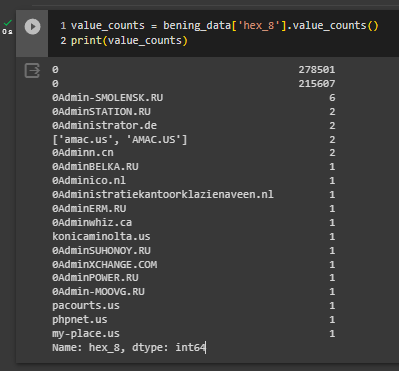

For example, in the 'hex_8' column there was a definite preponderance of zeros present, which do not contribute much informations.

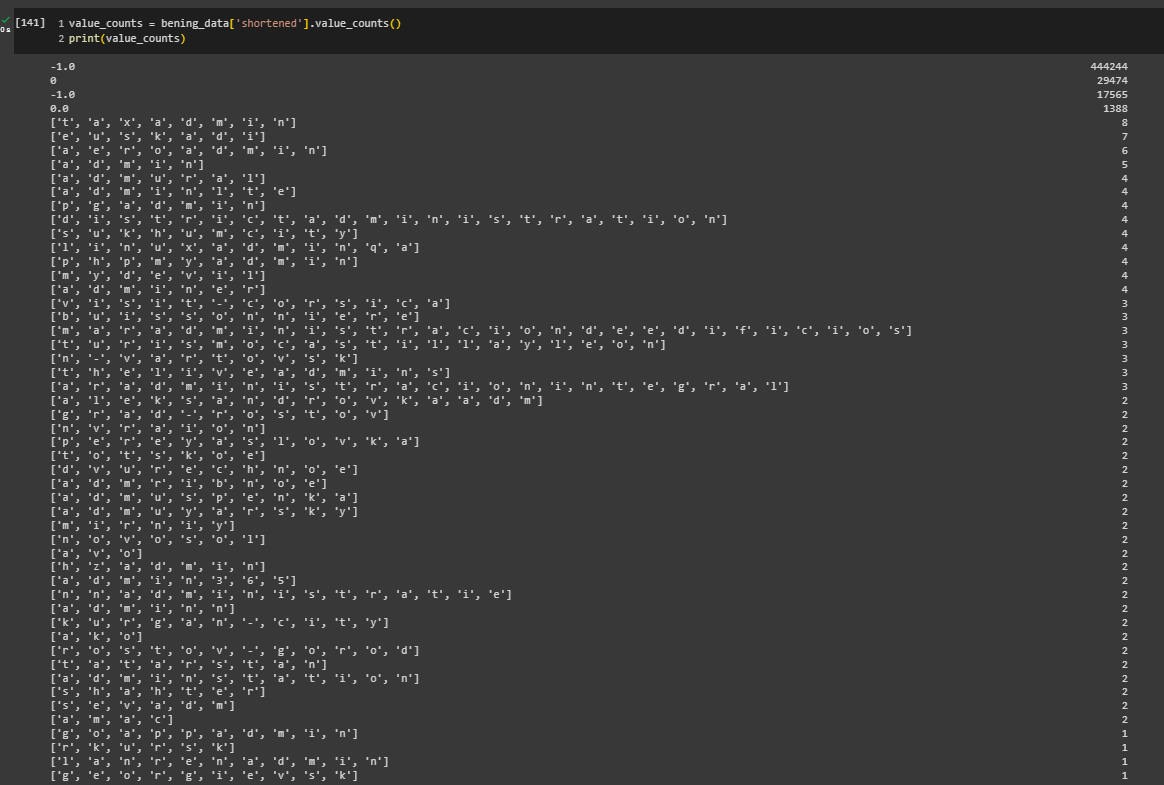

A similar phenomenon occurred here and in other columns that I decided to discard.

Thus, I had no other option but to discard irrelevant columns and convert the matrix values into numerical representations.

In [97]:
# list of columns to be removed
columns_to_remove = [
    'Registrant_Name', 'Organization', 'State', 'Country.1',
    'Emails', 'Registrar', 'Creation_Date_Time', 'Country',
    'ASN', 'IP', 'Domain_Name', 'Page_Rank', 'Name_Server_Count',
    'Domain_Age', 'Alexa_Rank', '1gram', '2gram', '3gram',
    'char_distribution', 'hex_32', 'hex_8', 'subdomain', 'shortened',
    'obfuscate_at_sign', 'dec_32', 'dec_8', 'numeric_percentage',
    'puny_coded', 'oc_8', 'oc_32'
]

combined_data = combined_data.drop(columns=columns_to_remove)

In [98]:
# checking the number of missing values
combined_data.isnull().sum()

TTL                0
Domain             0
len              358
longest_word     133
entropy            4
tld                3
typos              0
sld             1329
Label              0
dtype: int64

In [99]:
# delete rows with missing data in any column
combined_data_without_nan = combined_data.dropna()

In [100]:
# checking the number of missing values
combined_data_without_nan.isnull().sum()

TTL             0
Domain          0
len             0
longest_word    0
entropy         0
tld             0
typos           0
sld             0
Label           0
dtype: int64

In [101]:
combined_data_without_nan.shape

(497429, 9)

In [102]:
combined_data_without_nan.head()

,TTL,Domain,len,longest_word,entropy,tld,typos,sld,Label
0,46,b'google.com.',7,google,1.8348756474779464,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
1,299,b'google.com.',7,google,1.8348756474779464,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
2,38,b'www.google.com.',10,google,2.1142465351822795,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
3,299,b'www.google.com.',10,google,2.1142465351822795,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
4,96,b'facebook.com.',9,facebook,2.5954888901709436,com,"[('facebook.com', 100), ('qq.com', 86)]",facebook,0


In [103]:
combined_data_without_nan.tail()

,TTL,Domain,len,longest_word,entropy,tld,typos,sld,Label
499129,14399,b'naveenmechanical.com.',17,mechanical,2.890279,com,"[('facebook.com', 86), ('twitter.com', 86)]",naveenmechanical,1
499130,3599,b'onlinefrepdfviewer.000webhostapp.com.',32,p,3.808768,com,"[('twitter.com', 86), ('google.com', 86)]",000webhostapp,1
499131,3599,b'onlinefrepdfviewer.000webhostapp.com.',32,p,3.808768,com,"[('twitter.com', 86), ('google.com', 86)]",000webhostapp,1
499132,1799,b'stefanie-bolemant.de.',18,stefanie,3.340769,de,"[('google.de', 86), ('e-recht24.de', 86)]",stefanie-bolemant,1
499133,1799,b'web.asamnet.de.',11,mnet,2.781301,de,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",asamnet,1


# Convert to numerical values

Now, with complete data without any NaN values, the next step is to convert string and list-type data into numerical values. This conversion is essential for training, as we need all data in numeric form. Methods such as pd.to_numeric and label_encoder were applied to achieve this conversion.

In [104]:
# display everything
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [105]:
# copy into new matrix
combined_data_numeric = combined_data_without_nan.copy()

In [106]:
columns_to_check = ['TTL', 'Domain', 'len', 'longest_word',
                    'entropy', 'tld', 'typos', 'sld', 'Label'
                   ]

data_type_counts = {}

for column in columns_to_check:
    # checking the data types in a given column and counting the occurrences
    data_types = combined_data_numeric[column].apply(type).value_counts()
    data_type_counts[column] = data_types

for column, data_types in data_type_counts.items():
    print(f"Kolumna: {column}")
    print(data_types)
    print()

Kolumna: TTL
<class 'int'>    492430
<class 'str'>      4999
Name: TTL, dtype: int64

Kolumna: Domain
<class 'str'>    497429
Name: Domain, dtype: int64

Kolumna: len
<class 'str'>    492430
<class 'int'>      4999
Name: len, dtype: int64

Kolumna: longest_word
<class 'str'>    497429
Name: longest_word, dtype: int64

Kolumna: entropy
<class 'str'>      473469
<class 'float'>     23960
Name: entropy, dtype: int64

Kolumna: tld
<class 'str'>    497429
Name: tld, dtype: int64

Kolumna: typos
<class 'str'>    497429
Name: typos, dtype: int64

Kolumna: sld
<class 'str'>    497429
Name: sld, dtype: int64

Kolumna: Label
<class 'int'>    497429
Name: Label, dtype: int64



In [107]:
# convert the value in the 'TTL', 'len' and 'entropy' columns to floats or NaN if the value is invalid
combined_data_numeric['TTL'] = pd.to_numeric(combined_data_numeric['TTL'], errors='coerce')
combined_data_numeric['len'] = pd.to_numeric(combined_data_numeric['len'], errors='coerce')
combined_data_numeric['entropy'] = pd.to_numeric(combined_data_numeric['entropy'], errors='coerce')

In [108]:
# LabelEncoder initialization
label_encoder = LabelEncoder()

In [109]:
# convert the values in the 'Domain', 'longest_word', 'tld', and 'sld' columns to the numeric values
combined_data_numeric['Domain'] = label_encoder.fit_transform(combined_data_without_nan['Domain'])
combined_data_numeric['longest_word'] = label_encoder.fit_transform(combined_data_without_nan['longest_word'])
combined_data_numeric['tld'] = label_encoder.fit_transform(combined_data_without_nan['tld'])
combined_data_numeric['sld'] = label_encoder.fit_transform(combined_data_without_nan['sld'])

In [110]:
# convert the values in the 'typos' column to the numeric values by extracting data into 4 new columns

# function to extract data from the 'typos' column
def extract_typos_info(typos_str, position):
    try:
        # remove '[' and ']' characters and divide after commas
        typos_list = typos_str.strip('[]').split(', ')
        # select an item from the list and remove any "'" or """ characters.
        info = typos_list[position].strip('\'"')
        # remove special characters such as ')'
        info = info.rstrip(')')

        return info
    except (IndexError, AttributeError, ValueError):
        return -1  # returns -1 if data is not available

# create new columns based on the 'typos' column
combined_data_numeric['domain1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 0))
combined_data_numeric['percentage1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 1))
combined_data_numeric['domain2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 2))
combined_data_numeric['percentage2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 3))

# if the data in the 'domain1' and 'domain2' columns contain parentheses and quotation marks, remove them
combined_data_numeric['domain1'] = combined_data_numeric['domain1'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)
combined_data_numeric['domain2'] = combined_data_numeric['domain2'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)

# convert 'percentage1' and 'percentage2' columns to numeric values
combined_data_numeric['percentage1'] = combined_data_numeric['percentage1'].astype(float)
combined_data_numeric['percentage2'] = combined_data_numeric['percentage2'].astype(float)

# delete 'typos' column
combined_data_numeric.drop('typos', axis=1, inplace=True)

# display initial rows with new columns
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

        domain1  percentage1        domain2  percentage2
0    google.com        100.0  google.com.br         95.0
1    google.com        100.0  google.com.br         95.0
2    google.com        100.0  google.com.br         95.0
3    google.com        100.0  google.com.br         95.0
4  facebook.com        100.0         qq.com         86.0
5  facebook.com        100.0         qq.com         86.0
6  facebook.com        100.0         qq.com         86.0
7  facebook.com        100.0         qq.com         86.0
8  facebook.com        100.0         qq.com         86.0
9  facebook.com        100.0         qq.com         86.0


In [111]:
# convert the values in the new columns to the numeric values
domains = combined_data_numeric['domain1'].tolist() + combined_data_numeric['domain2'].tolist()
label_encoder.fit(domains)

# replace strings with numeric values in 'domain1' and 'domain2' columns
combined_data_numeric['domain1'] = label_encoder.transform(combined_data_numeric['domain1'])
combined_data_numeric['domain2'] = label_encoder.transform(combined_data_numeric['domain2'])

# display initial rows with new columns
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

   domain1  percentage1  domain2  percentage2
0      194        100.0      196         95.0
1      194        100.0      196         95.0
2      194        100.0      196         95.0
3      194        100.0      196         95.0
4      154        100.0      345         86.0
5      154        100.0      345         86.0
6      154        100.0      345         86.0
7      154        100.0      345         86.0
8      154        100.0      345         86.0
9      154        100.0      345         86.0


In [112]:
# delete all rows containing NaN fields
combined_data_numeric = combined_data_numeric.dropna()

In [113]:
# convert data type to float
combined_data_numeric = combined_data_numeric.astype(float)

In [114]:
# check if the operations worked
columns_to_check = ['TTL', 'Domain', 'len', 'longest_word',
                    'entropy', 'tld', 'sld', 'Label', 'domain1',
                    'percentage1', 'domain2', 'percentage2'
                    ]

data_type_counts = {}

for column in columns_to_check:
    data_types = combined_data_numeric[column].apply(type).value_counts()
    data_type_counts[column] = data_types

for column, data_types in data_type_counts.items():
    print(f"Kolumna: {column}")
    print(data_types)
    print()

Kolumna: TTL
<class 'float'>    466736
Name: TTL, dtype: int64

Kolumna: Domain
<class 'float'>    466736
Name: Domain, dtype: int64

Kolumna: len
<class 'float'>    466736
Name: len, dtype: int64

Kolumna: longest_word
<class 'float'>    466736
Name: longest_word, dtype: int64

Kolumna: entropy
<class 'float'>    466736
Name: entropy, dtype: int64

Kolumna: tld
<class 'float'>    466736
Name: tld, dtype: int64

Kolumna: sld
<class 'float'>    466736
Name: sld, dtype: int64

Kolumna: Label
<class 'float'>    466736
Name: Label, dtype: int64

Kolumna: domain1
<class 'float'>    466736
Name: domain1, dtype: int64

Kolumna: percentage1
<class 'float'>    466736
Name: percentage1, dtype: int64

Kolumna: domain2
<class 'float'>    466736
Name: domain2, dtype: int64

Kolumna: percentage2
<class 'float'>    466736
Name: percentage2, dtype: int64



# Correlation

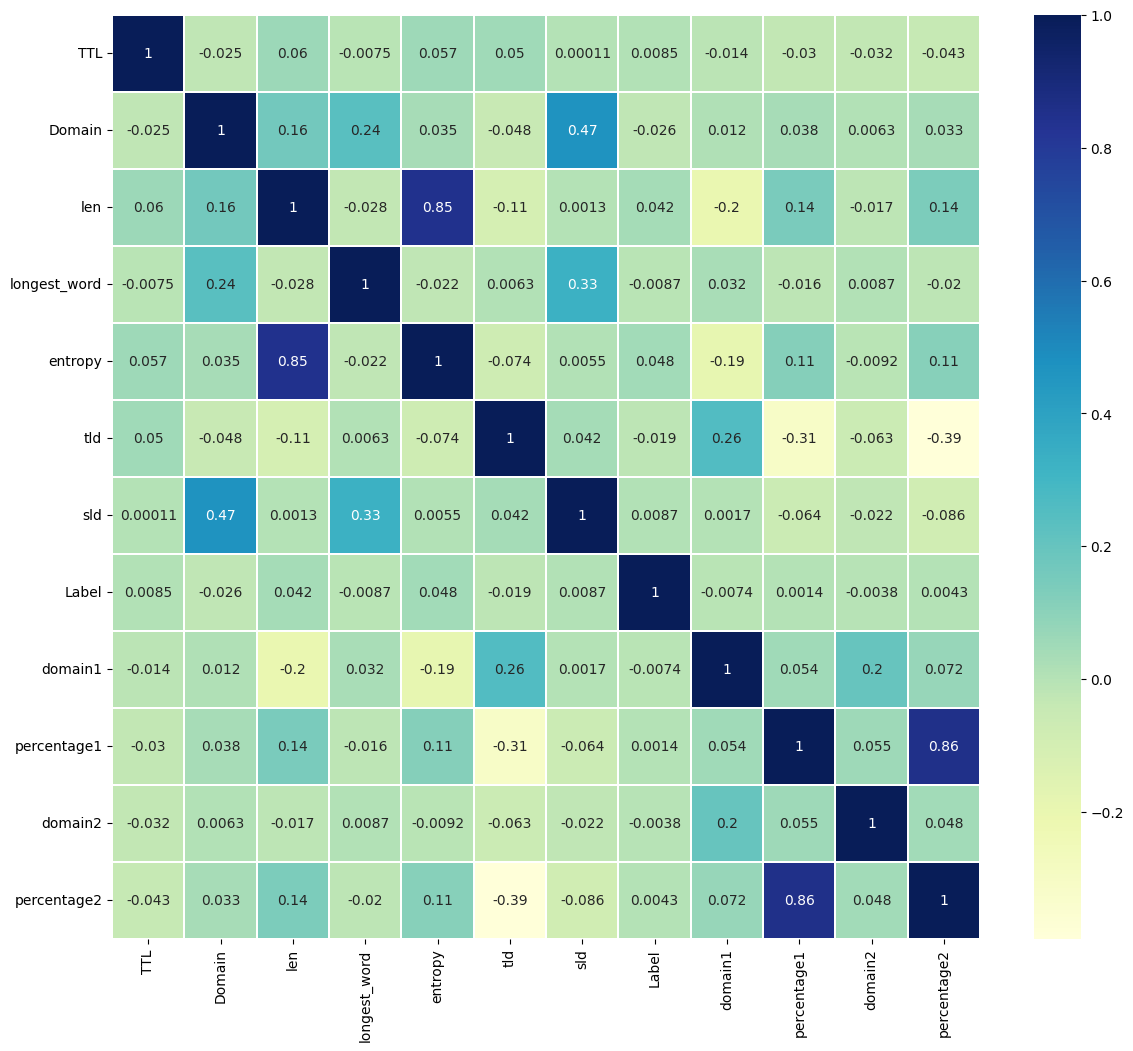

In [115]:
df = combined_data_numeric

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);


As seen, the correlation between categorical data appears to be good, with individual columns strongly correlated, such as entropy and len, or percentage1 and percentage2. The correct and more common approach in such cases would be to remove one of the correlated columns from the dataset. However, in this case, due to the circumstances, it was decided to keep them, which is not a big mistake.

In [116]:
combined_data_numeric.head(10)

,TTL,Domain,len,longest_word,entropy,tld,sld,Label,domain1,percentage1,domain2,percentage2
0,46,81777,5,12369,84,219,64450,0,192,62,193,63
1,299,81777,5,12369,84,219,64450,0,192,62,193,63
2,38,243326,8,12369,134,219,64450,0,192,62,193,63
3,299,243326,8,12369,134,219,64450,0,192,62,193,63
4,96,68027,7,10209,332,219,53517,0,152,62,342,54
5,264,68027,7,10209,332,219,53517,0,152,62,342,54
6,299,68027,7,10209,332,219,53517,0,152,62,342,54
7,299,68027,7,10209,332,219,53517,0,152,62,342,54
8,3170,238869,10,10209,439,219,53517,0,152,62,342,54
9,3274,238869,10,10209,439,219,53517,0,152,62,342,54


In [117]:
combined_data_numeric.tail(10)

,TTL,Domain,len,longest_word,entropy,tld,sld,Label,domain1,percentage1,domain2,percentage2
499124,1786,68025,60,17998,3249,219,119114,1,343,50,450,54
499125,3547,80603,8,12222,189,744,63583,1,453,50,308,54
499126,3546,80603,8,12222,189,744,63583,1,453,50,308,54
499127,3547,242923,11,12222,288,744,63583,1,453,50,308,54
499128,3547,104617,20,22281,2639,219,47,1,422,50,191,54
499129,9601,135974,15,19059,632,219,107079,1,152,50,421,54
499130,3547,145536,30,22281,3047,219,47,1,422,50,191,54
499131,3547,145536,30,22281,3047,219,47,1,422,50,191,54
499132,1786,183893,16,28946,1640,316,145067,1,195,50,130,54
499133,1786,211416,9,19756,496,316,12677,1,173,50,457,54


# Splitting the Features and Target

In [118]:
X = combined_data_numeric.drop('Label', axis=1)
y = combined_data_numeric['Label']

# Splitting into Training Data and Test Data

In [119]:
# divide the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model training and evaluation

## RandomForestClassifier

In [120]:
# initialization and training of the RandomForestClassifier model

model = RandomForestClassifier(n_estimators=100, random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [121]:
# forecasting on the test set
y_pred = model.predict(X_test)

# calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)

# display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

Dokładność modelu: 0.9923512019539786
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     92366
           1       0.86      0.32      0.47       982

    accuracy                           0.99     93348
   macro avg       0.93      0.66      0.73     93348
weighted avg       0.99      0.99      0.99     93348

Macierz pomyłek:
[[92315    51]
 [  663   319]]


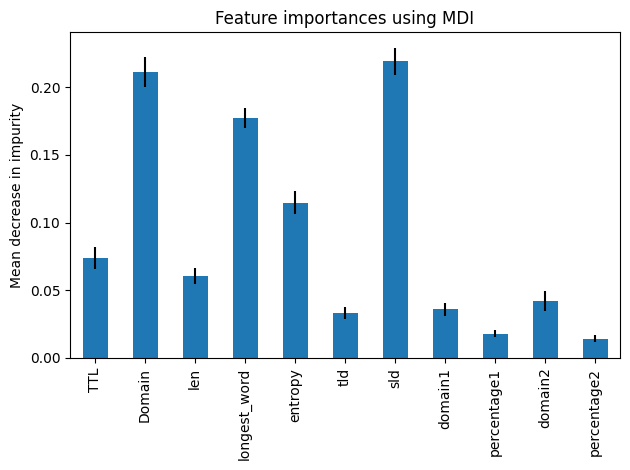

In [122]:
# calculate the importances of the features
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

feature_names = ['TTL', 'Domain', 'len', 'longest_word',
                 'entropy', 'tld', 'sld', 'domain1',
                 'percentage1', 'domain2', 'percentage2'
                ]
forest_importances = pd.Series(importances, index=feature_names)

# display feature importance chart
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

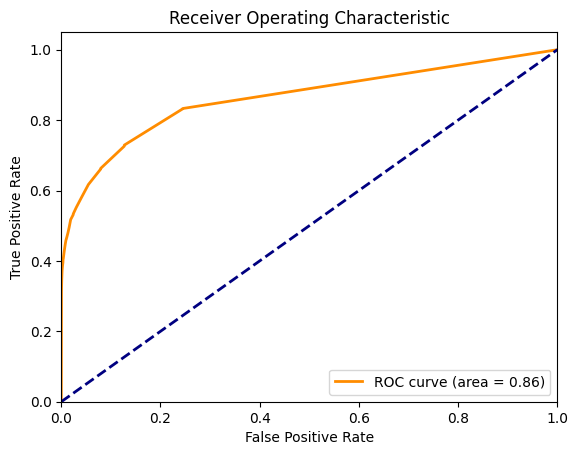

In [123]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

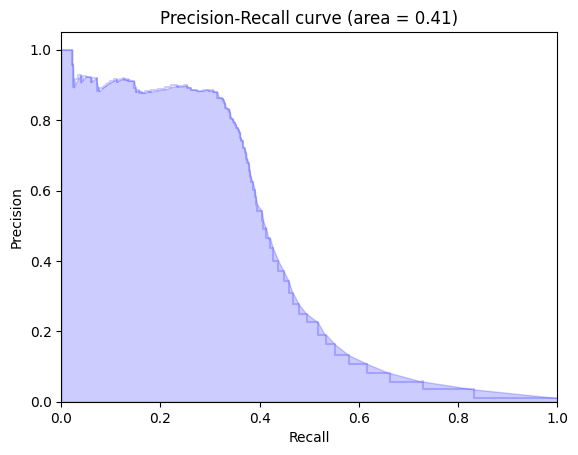

In [124]:
# PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve (area = %0.2f)' % average_precision)
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Dokładność walidacji krzyżowej: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Dokładność walidacji krzyżowej: 0.99 (+/- 0.00)


## XGBClassifier

In [126]:
feature_names = ['TTL', 'Domain', 'len', 'longest_word',
                 'entropy', 'tld', 'sld', 'domain1',
                 'percentage1', 'domain2', 'percentage2'
                ]
X = combined_data_numeric[feature_names]
y = combined_data_numeric['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
y_pred = model.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     92344
           1       0.92      0.11      0.20      1004

    accuracy                           0.99     93348
   macro avg       0.95      0.56      0.60     93348
weighted avg       0.99      0.99      0.99     93348

Accuracy: 0.9903586579251832


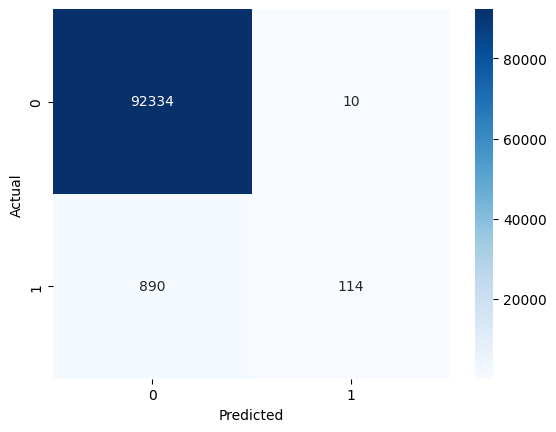

In [128]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Feature Importances')

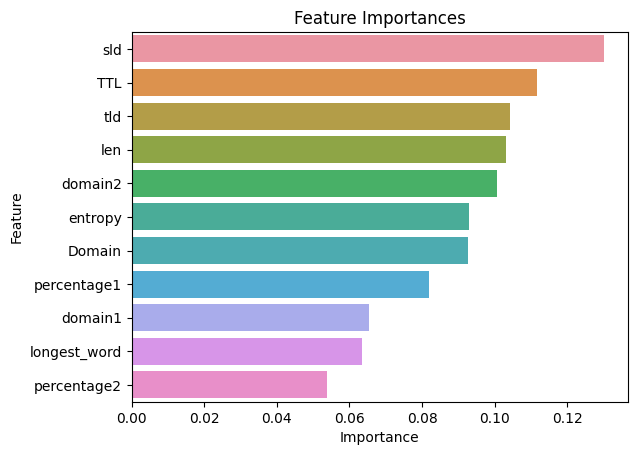

In [129]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')

Text(0.5, 1.0, '2-class Precision-Recall curve')

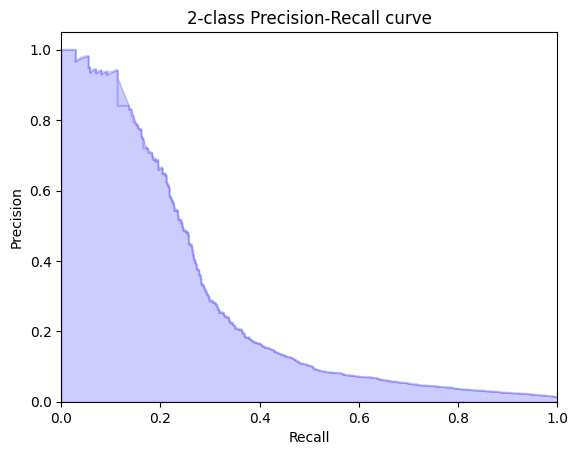

In [130]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

## KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
y_pred = knn.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     92344
           1       0.59      0.12      0.20      1004

    accuracy                           0.99     93348
   macro avg       0.79      0.56      0.60     93348
weighted avg       0.99      0.99      0.99     93348

Accuracy: 0.9896409135707246


In [133]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", roc_auc)


average_precision = average_precision_score(y_test, y_pred_proba)
print("AUC-PR:", average_precision)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

AUC-ROC: 0.8785205491815982
AUC-PR: 0.28263687464985177


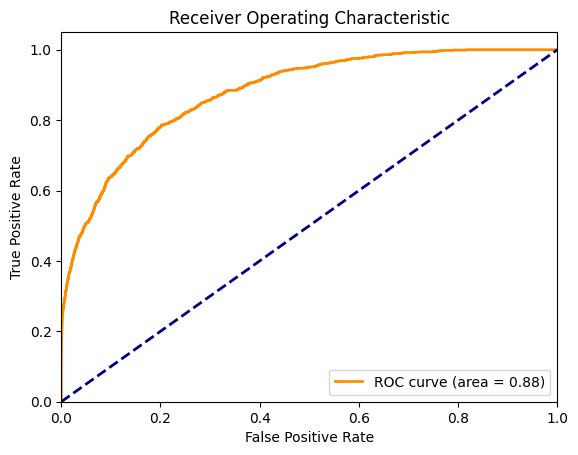

In [134]:
# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

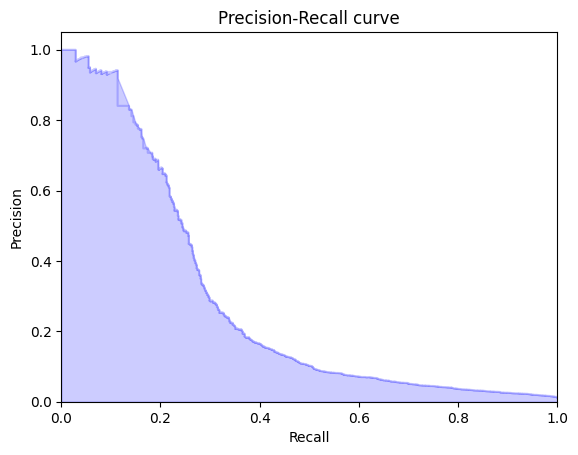

In [135]:
# PR curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

# Summary

**TASK: Present and describe how the model will perform on "production" data (such data that was not available at the time of training/evaluation).**


In the context of "production data," which was not available during the training and evaluation of the Random Forest Classifier, XGBoost Classifier and K-Nearest Neighbors models, we can predict how these models may perform.

**Random Forest Classifier:**

Model Accuracy: The model achieved high overall accuracy (0.9923) on the training and test data, suggesting it is capable of making good predictions on new data.

Precision and Recall: This model has high precision for class 0 (bening), indicating that it is cautious in predicting class 1 (malware) cases and minimizes false alarms. However, it has lower recall for class 1, meaning that it correctly identifies fewer actual class 1 cases.

F1-score: The F1-score for class 0 is high, which is a good sign of prediction accuracy.

Confusion Matrix: The confusion matrix shows that the model rarely makes false positives but struggles to detect actual class 1 cases.

**XGBoost Classifier:**

Model Accuracy: The XGBoost model also achieved high accuracy (0.9904) on the training and test data, suggesting its capability to handle new data.

Precision and Recall: This model has higher precision for class 0 (bening), but the value for class 1 (malware) is high aswell. However, class 1 has much lower recall, indicating it is less effective at detecting actual class 1 cases.

F1-score: The F1-score for class 1 is low, which can be problematic when the identification of this class is important.

Confusion Matrix: The XGBoost model struggles to detect actual class 1 cases, as evident from the confusion matrix.

**K-Nearest Neighbors Classifier**

Model Accuracy: The KNN classifier achieved an accuracy of approximately 0.9896 on the training and test data, which indicates its capability to make accurate predictions on new data.

Precision and Recall: KNN has a higher precision for class 0 (bening), showing caution in predicting class 1 (malware) cases and reducing the number of false alarms. However, the recall for class 1 is relatively low, indicating that it correctly identifies fewer actual class 1 cases.

F1-score: The F1-score for class 1 is relatively low, which may indicate some challenges in identifying class 1 cases effectively.

AUC-ROC and AUC-PR: The AUC-ROC score is approximately 0.8785, while the AUC-PR score is approximately 0.2826. These scores reflect the classifier's ability to separate the classes and perform precision-recall trade-offs.

In comparison to the previous Random Forest and XGBoost models, KNN achieved competitive accuracy and precision for class 0 but had challenges in correctly identifying class 1 (malware) cases, as evident from the lower recall and F1-score for class 1.

In summary, models appear to be cautious in predicting class 1 (malware). The Random Forest model achieved higher precision for class 0, while the XGBoost model achieved pretty similar high precisions for both classes. For "production data," the results will depend on the specific nature of the data and the significance of precision and recall in the given context. If precision in avoiding false positives is more critical, the Random Forest model may be better, while if precision in identifying actual class 1 cases is more crucial, the XGBoost model may be more suitable. Further optimization of the models is advisable to enhance their performance on new "production data."

Overall, the choice of the most suitable classifier depends on the specific requirements and trade-offs within the context of the application. Further fine-tuning and experimentation may be needed to enhance the models' performance on new "production data."

A substantial improvement in model effectiveness would result from increasing the amount of training data with from class 1 (malware), as there were only about 5,000 rows with this label, whereas for class 0 (benign), there were as many as 500,000 rows.

Devoting more time to data preprocessing, especially addressing the inconsistent data formats across columns and handling misleading information, would likely lead to improved outcomes in correctly identifying malware websites.